##  Car Evaluation Database and its connection to a simple hierarchical decision model developed for demonstrating DEX 
##  So it is classification problem

In [1]:
# Importing main libiraries

import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
#Loading the dataset
df=pd.read_csv("car_evaluation.csv",header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
# provide columns name:
df.columns=['buying', 'maint', 'doors', 'persons', 'boot_space', 'safety', 'class']

In [4]:
df

,buying,maint,doors,persons,boot_space,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [5]:
# showing first five rows
df.head()

,buying,maint,doors,persons,boot_space,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
# showing last five rows
df.tail()

,buying,maint,doors,persons,boot_space,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [7]:
#showing numbers of rows in df 
len(df)

1728

## Clean data - Feature Engineering

In [8]:
# First we check deta info by using info()method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1728 non-null   object
 1   maint       1728 non-null   object
 2   doors       1728 non-null   object
 3   persons     1728 non-null   object
 4   boot_space  1728 non-null   object
 5   safety      1728 non-null   object
 6   class       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Exploratory data analysis

In [9]:
# Showing no of Rows and columns
df.shape

(1728, 7)

In [10]:
# number of rows 
df.shape[0]

1728

In [11]:
# number of columns
df.shape[1]

7

In [12]:
# number of elements in df
df.size

12096

In [13]:
# we can discribe our data by using describe() method
df.describe().T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
boot_space,1728,3,small,576
safety,1728,3,low,576
class,1728,4,unacc,1210


In [14]:
# Checking missing values in df
df.isna().sum()

buying        0
maint         0
doors         0
persons       0
boot_space    0
safety        0
class         0
dtype: int64

In [15]:
# by using for loop checking columns wise value count
columns_names=list(df.columns)
columns_names

['buying', 'maint', 'doors', 'persons', 'boot_space', 'safety', 'class']

In [16]:
for columns in columns_names:
    print(df[columns].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
boot_space
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


## Data Prepration

In [17]:
x=df[df.columns]

In [18]:
# Ordinal Encoding categorical data change in numiracal data
encoder=OrdinalEncoder()
result=encoder.fit_transform(x)
result

array([[3., 3., 0., ..., 2., 1., 2.],
       [3., 3., 0., ..., 2., 2., 2.],
       [3., 3., 0., ..., 2., 0., 2.],
       ...,
       [1., 1., 3., ..., 0., 1., 2.],
       [1., 1., 3., ..., 0., 2., 1.],
       [1., 1., 3., ..., 0., 0., 3.]])

In [19]:
new_df = pd.DataFrame(result, columns=['buying', 'maint', 'doors', 'persons', 'boot_space', 'safety',"class"])

In [20]:
new_df

,buying,maint,doors,persons,boot_space,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [21]:
new_df.corr()

,buying,maint,doors,persons,boot_space,safety,class
buying,1.000000e+00,-3.436808e-16,-2.097088e-16,-4.089152e-17,-1.691262e-16,-2.439415e-16,0.051424
maint,-3.436808e-16,1.000000e+00,-6.466021e-17,-4.272143e-17,-1.549092e-16,-1.404810e-16,0.040194
doors,-2.097088e-16,-6.466021e-17,1.000000e+00,1.956599e-17,-1.942523e-17,1.062757e-16,-0.031327
persons,-4.089152e-17,-4.272143e-17,1.956599e-17,1.000000e+00,3.854941e-18,3.392348e-17,-0.299468
boot_space,-1.691262e-16,-1.549092e-16,-1.942523e-17,3.854941e-18,1.000000e+00,-1.541976e-17,0.033184
safety,-2.439415e-16,-1.404810e-16,1.062757e-16,3.392348e-17,-1.541976e-17,1.000000e+00,-0.021044
class,5.142422e-02,4.019365e-02,-3.132740e-02,-2.994683e-01,3.318432e-02,-2.104372e-02,1.000000


## Data Visualization

<Axes: >

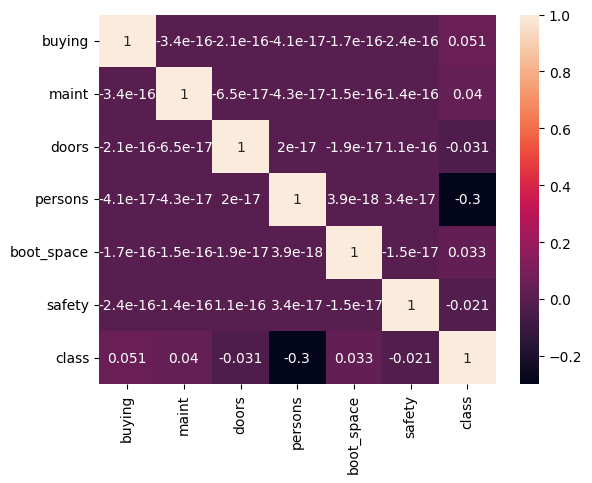

In [22]:
sns.heatmap(new_df.corr(),annot=True)

## Classification Algorithm - Decision Tree

## Data Prepration

In [23]:
X=new_df.drop("class",axis=1)
y=df["class"]

## Spliting the Data 

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

## Model Creation

In [25]:
model1=DecisionTreeClassifier(criterion='entropy',random_state=0)

## Model Training

In [26]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Model prediction

In [27]:
#prediction on test data
y_prd=model1.predict(X_test)

In [28]:
y_prd[0:10]

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc',
       'acc', 'good', 'unacc'], dtype=object)

In [29]:
accuracy_score_D=accuracy_score(y_test,y_prd)

In [30]:
accuracy_score_D

0.9807355516637478

In [31]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

         acc       0.98      0.94      0.96       126
        good       0.84      0.96      0.90        27
       unacc       0.99      1.00      0.99       399
       vgood       1.00      0.95      0.97        19

    accuracy                           0.98       571
   macro avg       0.95      0.96      0.95       571
weighted avg       0.98      0.98      0.98       571



## Random Forest Classifier

In [32]:
#Model Creation
model2=RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)

In [33]:
#Model Training
model2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [34]:
#prediction on test data
y_prd=model2.predict(X_test)

In [35]:
y_prd[:10]

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc',
       'acc', 'acc', 'unacc'], dtype=object)

In [36]:
accuracy_score_R=accuracy_score(y_test,y_prd)

In [37]:
accuracy_score_R

0.9772329246935202

In [38]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

         acc       0.94      0.97      0.95       126
        good       0.92      0.89      0.91        27
       unacc       1.00      0.99      0.99       399
       vgood       0.89      0.89      0.89        19

    accuracy                           0.98       571
   macro avg       0.94      0.94      0.94       571
weighted avg       0.98      0.98      0.98       571



In [39]:
feature_importance=pd.Series(model2.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_importance

safety        0.283220
persons       0.233427
buying        0.186073
maint         0.146471
boot_space    0.088959
doors         0.061850
dtype: float64

Text(0.5, 0, 'feature importance score')

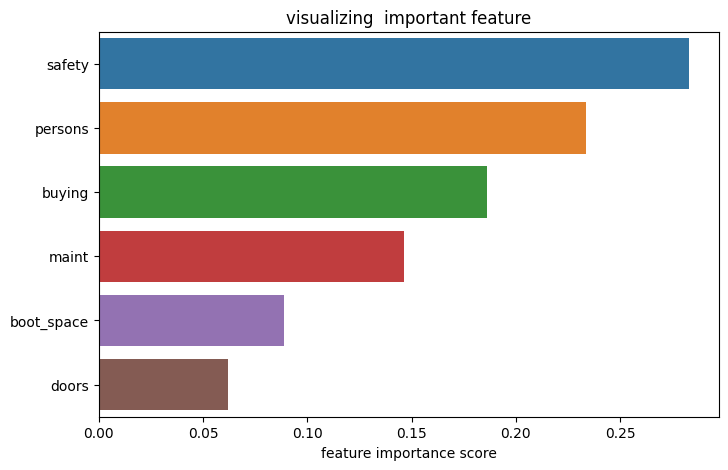

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance,y=feature_importance.index)
plt.title('visualizing  important feature')
plt.xlabel('feature importance score')

## SVM - Support Vector Machine

In [41]:
# SVM using Linear kernel
model3= SVC(kernel='linear',random_state=42)

In [42]:
model3.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [43]:
y_prd=model3.predict(X_test)

In [44]:
accuracy_score_svm=accuracy_score(y_test,y_prd)

In [45]:
accuracy_score_svm

0.7075306479859895

In [46]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

         acc       0.39      0.13      0.19       126
        good       0.00      0.00      0.00        27
       unacc       0.73      0.97      0.84       399
       vgood       0.00      0.00      0.00        19

    accuracy                           0.71       571
   macro avg       0.28      0.27      0.26       571
weighted avg       0.60      0.71      0.63       571



C:\Users\Pratibha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratibha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pratibha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

## Comparision - Decision Tree , Random Forest and SVM

In [48]:
models = pd.DataFrame({
    'Model': ['Decsion Tree', 'Random Forest','Support Vector Machines'],
    'Model Score': [accuracy_score_D, accuracy_score_R, accuracy_score_svm]})
models

,Model,Model Score
0,Decsion Tree,0.980736
1,Random Forest,0.977233
2,Support Vector Machines,0.707531


## in comparision among all three algorithms - decision tree , random forest and svm ,decision tree is giving the best score.